<a href="https://colab.research.google.com/github/matheusnunes06/ESTUDO_DE_CASO_QUINTO_ANDAR/blob/main/PROJETO_ANALISE_DE_PRECO_DE_ALUGUEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**1 - Problema**

A empresa Quinto Andar solicitou ao seu analista, para que fosse feita uma análise nos registros de imóveis cadastrado em seu banco e verificar as seguintes informações :



* Qual cidade contem o maior número de imóveis disponíveis no site, para locação?

* Qual cidade tem os imóveis mais caros para locação?

* O preço do aluguel pode ser impactado, se o cliente tiver animais de estimação?

*  Em imóveis mobiliados, o valor do aluguel é maior?

####**2 - Documentação**

Após extração de dados do banco de dados, foi fornecido um arquivo excel contendo as variáveis que serão utilizadas para responder o questionário acima descrito.

Informações:

*  Cidade - localização do imóvel
*  Área - quantidade de área construída em m²
*  Quartos - número de quartos existentes no imóvel
*  Banheiros - número de banheiros existentes no imóvel
*  Vagas_estacionamento - quantos carros cabem no imóvel
*  Andar - posição do imóvel na construção geral
*  Animal - demostra se é permitido animais de estimação ou não
*  Taxa_condominio - valor pago de condomínio
*  Preco_aluguel - valor cobrado pelo aluguel do imóvel
*  Taxa_iptu - valor de iptu cobrado
*  Taxa_incedio - Taxa de incêndio cobrada
*  Total_aluguel - valor final cobrado mensalmente com todas as taxas



In [8]:
#Carregando Bibliotecas utilizadas..
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#utilizado pra mudar esquemas de cores do seaborn.
sns.set(style = 'ticks')


In [9]:
#Carregando o arquivo excel que será anailsado.
df =pd.read_excel('casas_para_aluguel.xlsx')

In [10]:
#Verificando os nomes das colunas do Dataframe, se estão conforme a documentação, utilizando a função head.
df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
0,São Paulo,70.0,2.0,1.0,1.0,7,sim,sim,2065.0,3300.0,211.0,42.0,5618.0
1,São Paulo,320.0,4.0,4.0,0.0,20,sim,nao,1200.0,4960.0,1750.0,63.0,7973.0
2,Porto Alegre,80.0,1.0,1.0,1.0,6,sim,nao,1000.0,2800.0,0.0,41.0,3841.0
3,Porto Alegre,51.0,2.0,1.0,0.0,2,sim,nao,270.0,1112.0,22.0,17.0,1421.0
4,São Paulo,25.0,1.0,1.0,0.0,1,nao,nao,0.0,800.0,25.0,11.0,836.0


In [11]:
#Verificando caracteriticas do dataframe.
df.info()

'''Podemos verificar o tipo de cada coluna, o nome das colunas, o total de colunas, o total de linhas, se existem elementos faltantes.
No Dataframe utilizado, foi verificado que não existe elemenos nulos.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cidade                10692 non-null  object 
 1   area                  10692 non-null  float64
 2   quartos               10692 non-null  float64
 3   banheiros             10692 non-null  float64
 4   vagas_estacionamento  10692 non-null  float64
 5   andar                 10692 non-null  object 
 6   animal                10692 non-null  object 
 7   mobiliado             10692 non-null  object 
 8   taxa_condominio       10692 non-null  float64
 9   preco_aluguel         10692 non-null  float64
 10  taxa_iptu             10692 non-null  float64
 11  taxa_incendio         10692 non-null  float64
 12  total_aluguel         10692 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.1+ MB


'Podemos verificar o tipo de cada coluna, o nome das colunas, o total de colunas, o total de linhas, se existem elementos faltantes.\nNo Dataframe utilizado, foi verificado que não existe elemenos nulos.'

In [12]:
#verificando a porcentagem de valores nulos, para confirmar a informação anterior, que não existe valores nulos no dataframe.
100*df.isnull().sum()/df.shape[0]

cidade                  0.0
area                    0.0
quartos                 0.0
banheiros               0.0
vagas_estacionamento    0.0
andar                   0.0
animal                  0.0
mobiliado               0.0
taxa_condominio         0.0
preco_aluguel           0.0
taxa_iptu               0.0
taxa_incendio           0.0
total_aluguel           0.0
dtype: float64

Desse modo, confirmamos a informação.

In [13]:
#Verificando o shape do dataframe, e confirmando a informação acima.
df.shape

(10692, 13)

In [14]:
# Para verificar somente a informações dos tipos existentes em cada coluna.
df.dtypes

cidade                   object
area                    float64
quartos                 float64
banheiros               float64
vagas_estacionamento    float64
andar                    object
animal                   object
mobiliado                object
taxa_condominio         float64
preco_aluguel           float64
taxa_iptu               float64
taxa_incendio           float64
total_aluguel           float64
dtype: object

In [18]:
#Verificando informações gerais do dataframe.
df.describe().round(2)



,area,quartos,banheiros,vagas_estacionamento,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


Dessa maneira, é possivel visualizar de maneira geral, o menor valor de alguel de um imóvel, o maior valor de aluguel de um imóvel,
a média de valor de alguel, dentre outras informações relevantes.

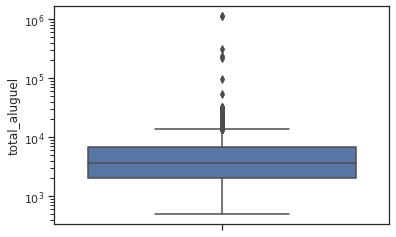

In [19]:
#Verificando boxplot.
fig, ax = plt.subplots()
ax.set(yscale="log")
sns.boxplot(data=df.total_aluguel, y=(df.total_aluguel+1))
plt.show()

Com o boxplot, podemos visualizar que existem potênciais valores discrepantes (outliers), no dataframe.

####**Qual cidade contém o maior número de imóveis disponíveis no site, para locação?**

In [21]:
#Verifacando em quantas cidades o dataframe em questão, dispõe de imóveis para aluguel.
'''Temos como resposta, que no momento, o site dispões de imóveis em 5 cidades no Brasil'''
df['cidade'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

Temos como resposta, que no momento, o site dispões de imóveis em 5 cidades no Brasil.

In [22]:
#Verificando em qual cidade contém mais imóveis disponíveis.

df['cidade'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: cidade, dtype: int64

Dessa maneira, é possivel visualizar quais são as cidades e que o maior numero de imóveis estão localizados em São Paulo.
Dessa maneira, conseguimos solucionar o primeiro questionamento solicitado.

In [23]:
#Podemos verificar o percentual de imóveis, por cidades
porcentagem_imóveis_cidade =100*df['cidade'].value_counts(normalize = True).round(2)
porcentagem_imóveis_cidade

São Paulo         55.0
Rio de Janeiro    14.0
Belo Horizonte    12.0
Porto Alegre      11.0
Campinas           8.0
Name: cidade, dtype: float64

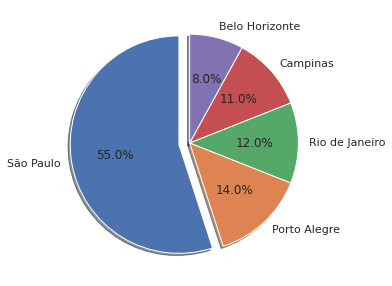

In [24]:
#Utilizando o gráfico piechart, conseguimos visualizar de maneira gráfica o percentual de imóveis por cidades.
#definindo variáveis para serem usadas no gráfico.
label = df['cidade'].unique()
porcentagem = porcentagem_imóveis_cidade
separar = (0.1, 0, 0, 0, 0)

plt.figure(figsize = (15,5)) 
#autopct= '%1.1f%%' é utlizado para plotar o valor percentual da variável porcentagem, no gráfico.
#Foi criada a variável separar, com uma tupla e uma pequena variação na posição da cidade com maior porcentagem, para separar essa
#informação no gráfico e deixar em evidência.
plt.pie(x = porcentagem, labels = label, explode= separar, autopct= '%1.1f%%', startangle = 90, shadow= True)

plt.show()

Temos como resposta, que no momento, a cidade que mais dispõe de imóveis para alugar, é São Paulo, contendo 55% dos imóveis.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


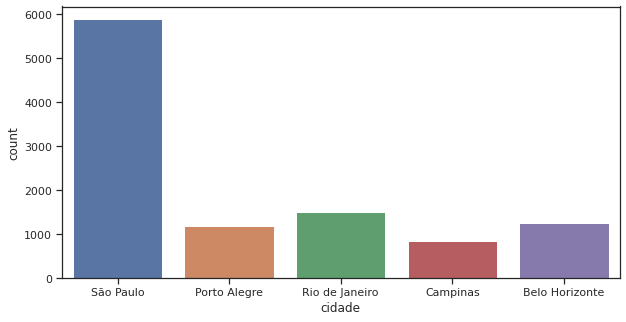

In [25]:
#caso seja necessário alterar o tamanho do gráfico, usamos oa função plt.figure( figsize=(x,y))
plt.figure(figsize = (10,5))
sns.countplot(df['cidade'])
plt.show()

Dessa outra forma, também conseguimos demonstrar de maneira visual a quantidade de cidades e qual delas tem o maior número de imóveis.

####**Qual cidade tem os imóveis mais caros para locação?**

In [26]:
#ordernando a variável pela coluna cidade em relação a coluna total_aluguel
maior_preco = df.groupby('cidade')['total_aluguel'].describe().reset_index()
maior_preco.sort_values(['mean','count'], ascending=False).head()

,cidade,count,mean,std,min,25%,50%,75%,max
4,São Paulo,5887.0,6380.831833,7541.320897,508.0,2631.00,4596.0,8591.00,316900.0
0,Belo Horizonte,1258.0,6315.242448,44654.831555,499.0,1611.25,3040.0,5925.75,1120000.0
3,Rio de Janeiro,1501.0,4611.684877,4425.357934,507.0,2067.00,3253.0,5566.00,95610.0
1,Campinas,853.0,3173.276671,2857.281849,711.0,1417.00,2140.0,3632.00,20560.0
2,Porto Alegre,1193.0,2989.782900,2734.499521,509.0,1465.00,2211.0,3338.00,32750.0


In [27]:
#outra maneira de verificar a média dos valores cobrados por cidade para aluguel.
media_preco = df.groupby('cidade')['total_aluguel'].median()
media_preco

cidade
Belo Horizonte    3040.0
Campinas          2140.0
Porto Alegre      2211.0
Rio de Janeiro    3253.0
São Paulo         4596.0
Name: total_aluguel, dtype: float64

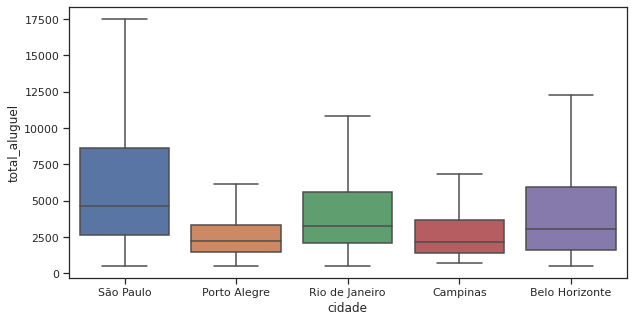

In [28]:
# Visualizando de maneira gráfica utilizando o boxplot.
plt.figure(figsize = ( 10,5))
sns.boxplot(x = 'cidade', y = 'total_aluguel', data = df, showfliers = False) 
# utilizando showfliers, eliminaremos do gráfico os valores discrepantes ou outliers.
plt.show()

Dessa maneira, checamos que levando em consideração a mediana, São Paulo contém o aluguel mais caro.

####**O preço do aluguel pode ser impactado, se o cliente tiver animais de estimação?**

In [29]:
df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,taxa_condominio,preco_aluguel,taxa_iptu,taxa_incendio,total_aluguel
0,São Paulo,70.0,2.0,1.0,1.0,7,sim,sim,2065.0,3300.0,211.0,42.0,5618.0
1,São Paulo,320.0,4.0,4.0,0.0,20,sim,nao,1200.0,4960.0,1750.0,63.0,7973.0
2,Porto Alegre,80.0,1.0,1.0,1.0,6,sim,nao,1000.0,2800.0,0.0,41.0,3841.0
3,Porto Alegre,51.0,2.0,1.0,0.0,2,sim,nao,270.0,1112.0,22.0,17.0,1421.0
4,São Paulo,25.0,1.0,1.0,0.0,1,nao,nao,0.0,800.0,25.0,11.0,836.0


In [30]:
#Verificando se existe outra opção além de permitido ou não, animais de estimação.
df['animal'].unique()

array(['sim', 'nao'], dtype=object)

In [31]:
df['animal'].value_counts()

sim    8316
nao    2376
Name: animal, dtype: int64

In [32]:
#Cálculo da porcentagem de imóveis que aceitam ou não animais de estimação.
porc_animal= 100*df['animal'].value_counts(normalize = True).round(2)
porc_animal

sim    78.0
nao    22.0
Name: animal, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


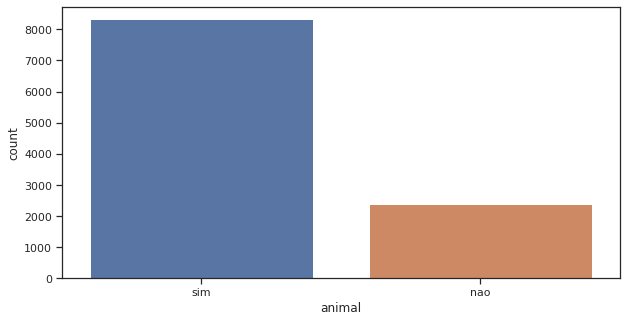

In [33]:
#Maneira gráfica de visualizar o total de imóveis que aceitam animais de estimação e que não aceitam.
plt.figure(figsize=(10,5))
sns.countplot(df['animal'])
plt.show()

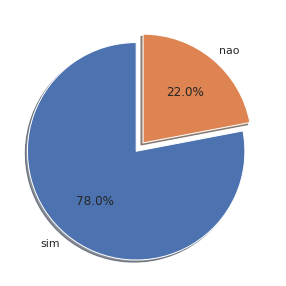

In [34]:
#Demonstração gráfica do resultado da porcentagem de imóveis que aceitam animais.
label = df['animal'].unique()
porcentagem_tipos = porc_animal= 100*df['animal'].value_counts(normalize = True).round(2)
separar = (0.1, 0)

plt.figure(figsize = (15,5)) 

plt.pie(x = porcentagem_tipos, labels = label, explode= separar, autopct= '%1.1f%%', startangle = 90, shadow= True)

plt.show()

Somente duas opçãos estão disponíveis nesse dataframe e 78% dos imóveis aceitam animais.

In [35]:
# utilizando o groupby, ordenando a coluna animais em relação a coluna total_aluguel, podemos calcular a mediana
# de preços para imóveis que aceitam e imóveis que não aceitam animais.
media_preco_com_animal = df.groupby('animal')['total_aluguel'].median()
media_preco_com_animal

animal
nao    3217.5
sim    3701.0
Name: total_aluguel, dtype: float64

No geral, levando em consideração a mediana, os imóveis que aceitam animais tem o valor  maior do que o valor dos imóveis que não aceitam animais.

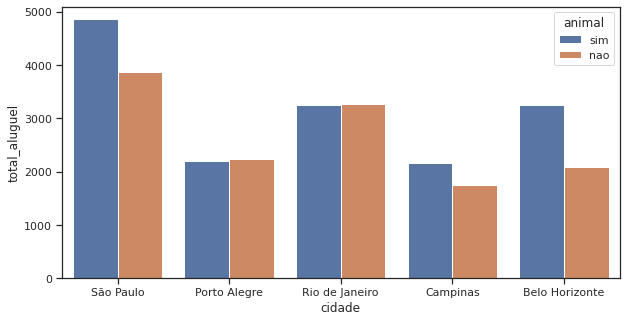

In [36]:
#utilizando o grafico barplot, podemos visualizar o valor medio pago por cidade, de imóveis que aceitam ou não animais.
plt.figure(figsize=(10,5))
# utilizando o parâmetro hue para a coluna animal, conseguimos concatenar as irnfomações de valor da mediana paga com ou sem animais, por cidades existentes
sns.barplot(x = df['cidade'], y = df['total_aluguel'], hue = df['animal'], ci = False, estimator= np.median)

plt.show()

Chegamos a conclusão que em São Paulo, Campinas e Belo Horizonte, o fato de ter animais de estimação resulta em um valor mais alto ao fechar o aluguel de um imóvel, e em Porto Alegre e no Rio de Janeiro, praticamente não existe diferença em ter ou não, animais de estimação em relação ao preço de aluguel.

####**Em imóveis mobiliados, o valor do aluguel é maior?**

In [37]:
#Verificando se existe outra opção além de mobiliado ou não.
df['animal'].unique()

array(['sim', 'nao'], dtype=object)

In [38]:
#Verificando a quantidade de imóveis mobiliados ou não 
df['mobiliado'].value_counts()

nao    8086
sim    2606
Name: mobiliado, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


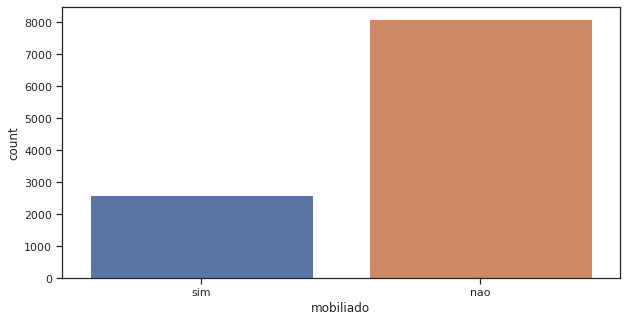

In [39]:
#Rwpresentação gráfica do total de imóveis mobiliados ou não.
plt.figure(figsize=(10,5))
sns.countplot(df['mobiliado'])
plt.show()

In [40]:
#Verificando a porcentagem de imóveis mobiliados ou não 
porc_mobiliado= 100*df['mobiliado'].value_counts(normalize = True).round(2)
porc_mobiliado

nao    76.0
sim    24.0
Name: mobiliado, dtype: float64

Apenas 24% dos imóveis disponíveis estão com mobilia disponível, tornando a oferta menor.

In [41]:
# utilizando o groupby, ordenando a coluna mobiliado em relação a coluna total_aluguel, podemos calcular a mediana
# de preços para imóveis mobiliados ou não.
media_preco_com_animal = df.groupby('mobiliado')['total_aluguel'].median()
media_preco_com_animal

mobiliado
nao    3170.0
sim    4855.5
Name: total_aluguel, dtype: float64

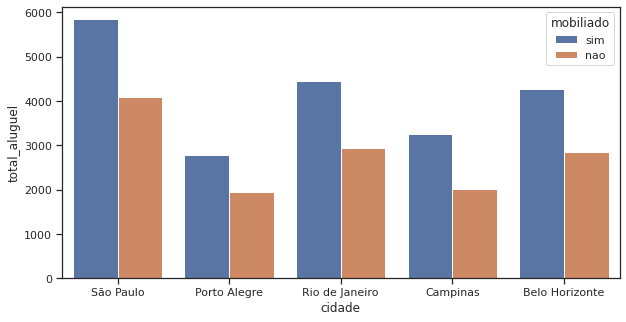

In [42]:
#utilizando o grafico barplot, podemos visualizar o valor mediano pago por cidade, de imóveis mobiliados ou não.
plt.figure(figsize=(10,5))
sns.barplot(x = df['cidade'], y = df['total_aluguel'], hue = df['mobiliado'], ci = False, estimator= np.median)

plt.show()

<Figure size 1080x360 with 0 Axes>

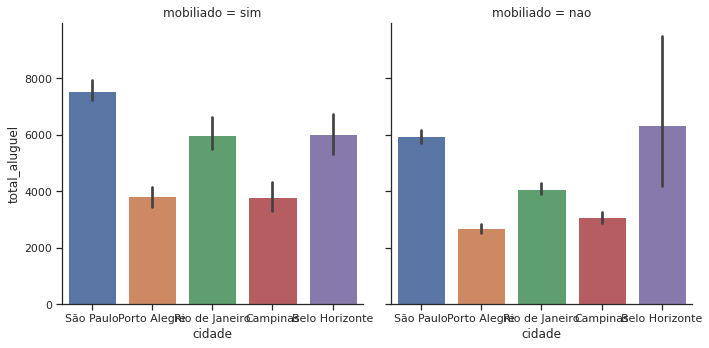

In [43]:
#Outra maneira gráfica de visualizar, é usando o cartplox com o tipo de barras, para visualizar os valores cobrados por cidade.
plt.figure(figsize = (15,5))
sns.catplot(x = 'cidade', y = 'total_aluguel', col = 'mobiliado', kind = 'bar', data = df)

Chegamos a conclusão que a quantidade de imóveis mobiliados disponíveis é bem meno do que não mobiliados, e o fator mobiliado afeta o preço de aluguel em toda as cidades contidas no estudo.